In [1]:
from ctlearn_manager.tri_model import CTLearnTriModelManager
from ctlearn_manager.io.io import load_model_from_index
from ctlearn_manager.utils.sky_coord_utils import DL2DataProcessor

🔧 Using cluster lst-cluster with account aswg and python environment ctlearn-cluster
🔧 Using cluster lst-cluster with account aswg and python environment ctlearn-cluster


In [2]:
MODEL_INDEX_FILE = "/home/bastien.lacave/PhD/Analysis/CTLearnManager/ctlearn_models_index.h5"
i = 4
energy_model = load_model_from_index(f"LST1_energy_CRABdec_{i}", MODEL_INDEX_FILE)
direction_model = load_model_from_index(f"LST1_direction_CRABdec_{i}", MODEL_INDEX_FILE)
type_model = load_model_from_index(f"LST1_type_CRABdec_{i}", MODEL_INDEX_FILE)
Stereo_Tri_Model = CTLearnTriModelManager(direction_model=direction_model, energy_model=energy_model, type_model=type_model)

🧠 Model name: LST1_energy_CRABdec_4


🧠 Model name: LST1_direction_CRABdec_4
🧠 Model name: LST1_type_CRABdec_4


In [3]:
import glob
dl2_files_tjark = glob.glob("/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run0*.h5")
dl2_files_bastien = glob.glob("/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/02929/*dl2*.h5")
print(len(dl2_files_bastien))
# Theta2plot = DL2DataProcessor(dl2_files_tjark, Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")
# Theta2plot = DL2DataProcessor(['/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/03232/LST-1.Run03232.0000.dl2.h5'], Stereo_Tri_Model, gammaness_cut=0.9)
Theta2plot = DL2DataProcessor(['/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run02929.h5'], Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")

199
LST1 is in the telescope names
Preprocessing DL2 data...
Loading processed DL2 data from /home/bastien.lacave/PhD/data/CTLearn/Tjark/dl2_LST-1.Run02929_dl2_processed.pkl


26945 events after cuts
Computing sky positions...


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'AltAz': Cannot determine Numba type of <class 'abc.ABCMeta'>

File "../../../../../../../home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py", line 137:
def transform_coordinates(alt, az, obstime_unix, location_lat, location_lon, location_height, pressure, temperature, relative_humidity, source_position_ra, source_position_dec):
    <source elided>
    for i in range(n):
        frame = AltAz(obstime=Time(obstime_unix[i], format='unix'), location=EarthLocation(lat=location_lat, lon=location_lon, height=location_height), pressure=pressure, temperature=temperature, relative_humidity=relative_humidity)
        ^


Computing on-off counts...


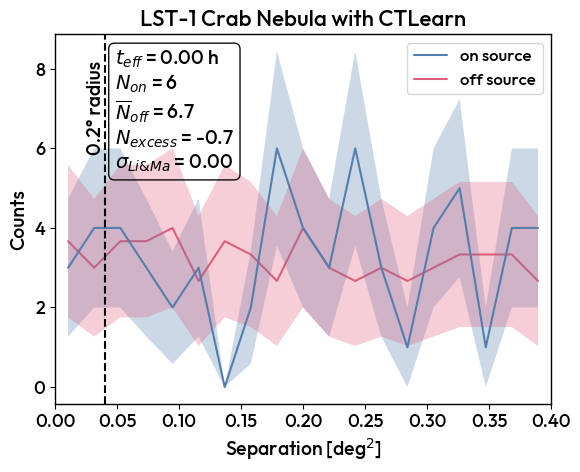

In [4]:
Theta2plot.plot_theta2_distribution(bins=20,)
# Theta2plot.plot_theta2_distribution(DL2_files= ["/home/bastien.lacave/LST-1.Run02929.0000.dl2.h5"], bins=10, tel_id=1, gammaness_cut=0.0)